## 这个文件展示了，均匀日面，理想的情况下，不使用AIA数据，讨论谱线轮廓

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import math
from calculating_DN_1000 import wavelength_point_num, wavelength_list
from calculating_DN_1000 import angle_point_num_alpha,offaxis_angle_x_alpha, offaxis_angle_y_alpha
from calculating_DN_1000 import angle_point_num_beta,offaxis_angle_x_beta, offaxis_angle_y_beta

DN = np.load("output_DN/DN_1000.npz")

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

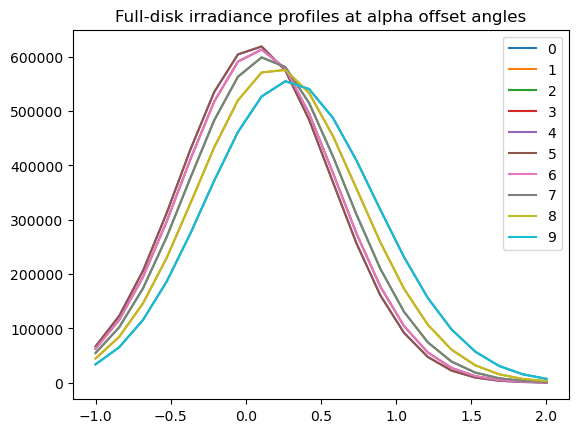

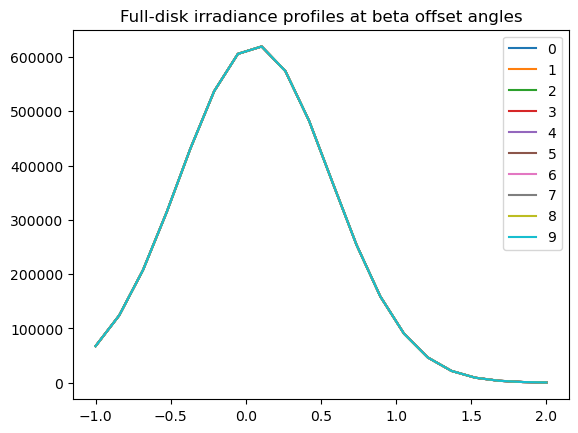

In [4]:
# Profiles during cruciformscan
fig, ax = plt.subplots()
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_list, DN['DN_alpha'][i],  label=str(i))
# ax.set_title("He II 谱线轮廓随入射偏角𝜶变化的模拟结果")
ax.legend()
ax.set_title("Full-disk irradiance profiles at alpha offset angles")

# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_list, DN['DN_beta'][j], label=str(j))
# ax.set_title("He 谱线轮廓随入射偏角𝜷变化的模拟结果")
ax.legend()
ax.set_title("Full-disk irradiance profiles at beta offset angles")

In [5]:
# Fit data in DN.npz
wavelength_shift_alpha = np.zeros(angle_point_num_alpha)
fit_alpha = []   # List of Gaussian1D
for i in range(angle_point_num_alpha):
    g_init = models.Gaussian1D(amplitude=3E4, mean=0, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_alpha'][i])
    wavelength_shift_alpha[i] = g.mean.value
    fit_alpha.append(g)


wavelength_shift_beta = np.zeros(angle_point_num_beta)
fit_beta = []  # List of Gaussian1D
for j in range(angle_point_num_beta):
    g_init = models.Gaussian1D(amplitude=3E5, mean=0, stddev=0.0424)
    # initial value for fitting
    fit_g = fitting.LevMarLSQFitter()
    g = fit_g(g_init, wavelength_list, DN['DN_beta'][j])
    wavelength_shift_beta[j] = g.mean.value
    fit_beta.append(g)

Text(0.5, 1.0, 'beta')

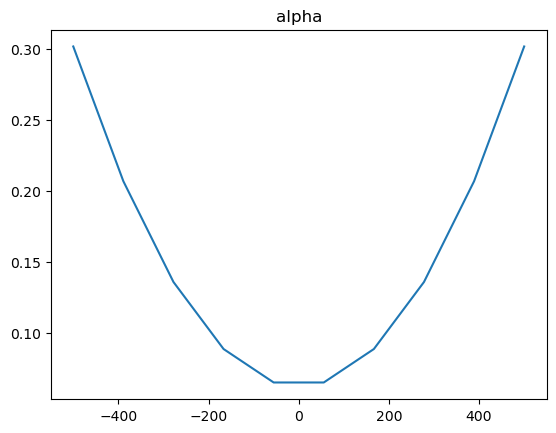

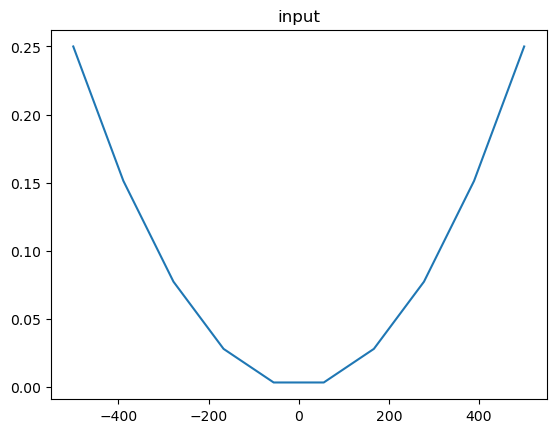

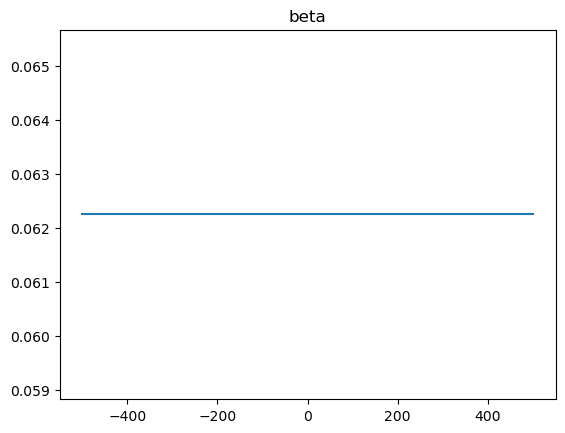

In [6]:
# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_alpha, wavelength_shift_alpha)
ax.set_title("alpha")

# Central wavelength shift
fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_alpha, offaxis_angle_x_alpha**2/1000000)
ax.set_title("input")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_beta, wavelength_shift_beta)
ax.set_title("beta")
# %%

Text(0.5, 0, 'Beta Offset (rad)')

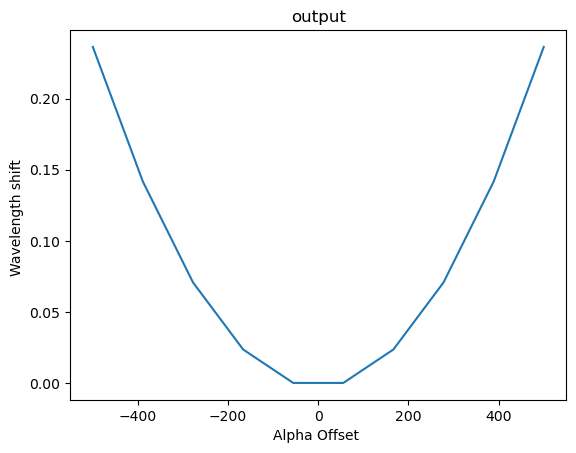

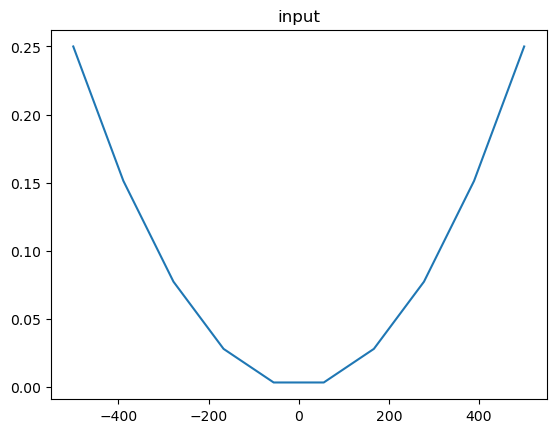

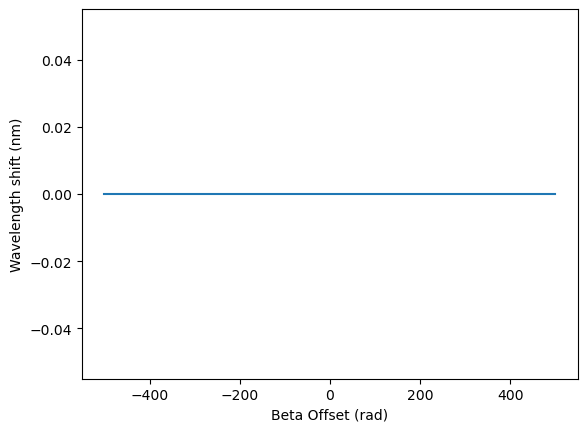

In [7]:
# Panned central wavelength shift
# Y 轴的零点被设定为全日面 He II 谱线在没有任何 SDO 卫星偏转时的中心波长位置，
# 也就是𝛼 = 0且𝛽 = 0的情况

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_alpha, wavelength_shift_alpha -
        wavelength_shift_alpha[int(angle_point_num_alpha/2)])
ax.set_title('output')
ax.set_xlabel("Alpha Offset ")
ax.set_ylabel("Wavelength shift ")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_x_alpha, offaxis_angle_x_alpha**2/1000000)
ax.set_title("input")

fig, ax = plt.subplots()
ax.plot(offaxis_angle_y_beta, wavelength_shift_beta -
        wavelength_shift_beta[int(angle_point_num_beta/2)])
ax.set_ylabel('Wavelength shift (nm)')
ax.set_xlabel("Beta Offset (rad)")
# %%

Text(0.5, 1.0, 'Full-disk irradiance profiles at beta offset angles')

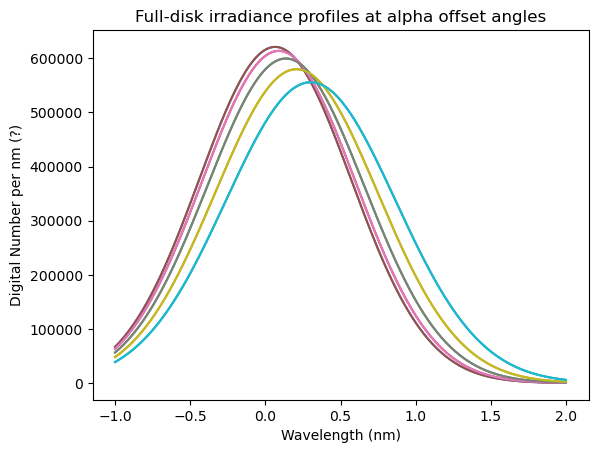

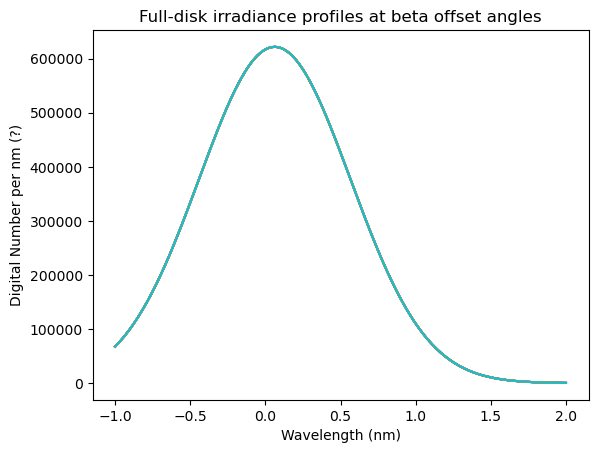

In [8]:
# Fitted profiles during cruciformscan
fig, ax = plt.subplots()
wavelength_densed_list = np.linspace(-1, 2, 10*wavelength_point_num)
# Profiles during cruciformscan in alpha direction
for i in range(angle_point_num_alpha):
    ax.plot(wavelength_densed_list, fit_alpha[i](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")
ax.set_title("Full-disk irradiance profiles at alpha offset angles")


# Profiles during cruciformscan in beta direction
fig, ax = plt.subplots()
for j in range(angle_point_num_beta):
    ax.plot(wavelength_densed_list, fit_beta[j](
        wavelength_densed_list), label='linear')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("Digital Number per nm (?)")
ax.set_title("Full-disk irradiance profiles at beta offset angles")


## 谱线中心的平均 不等于 拟合中心波长

In [47]:
a_y=[2,0.5,0.5]
a_x=[0,1.1,0.9]
a_init=models.Gaussian1D(amplitude=2, mean=1, stddev=1)
fit_a = fitting.LevMarLSQFitter()
a=fit_a(a_init,a_x,a_y)
a

<Gaussian1D(amplitude=327.72522929, mean=-7.75950754, stddev=2.42914167)>

(0.0, 3.0)

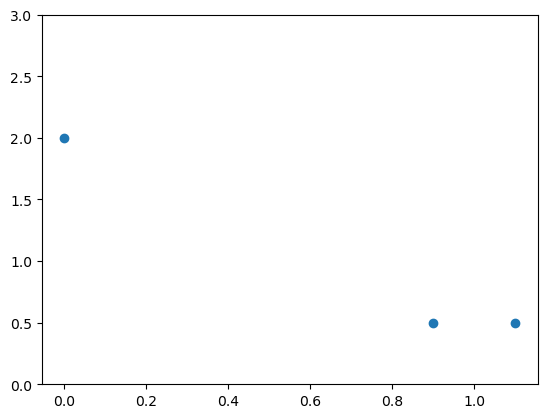

In [48]:
fig, ax = plt.subplots()
ax.scatter(a_x,a_y)
ax.set_ylim(0,3)

In [55]:
b_y=[2,0.5,0.5]
b_x=[0,-1,3]

b_init=models.Gaussian1D(amplitude=1, mean=0, stddev=0.3)
fit_b = fitting.LevMarLSQFitter()
b=fit_b(a_init,b_x,b_y)
b

<Gaussian1D(amplitude=3.1748021, mean=1., stddev=1.04020252)>

(0.0, 3.0)

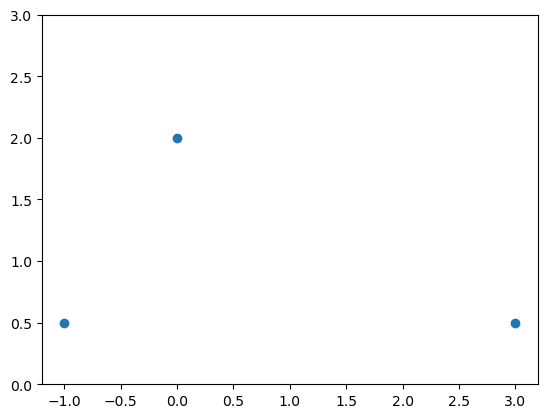

In [57]:
fig, ax = plt.subplots()
ax.scatter(b_x,b_y)
ax.set_ylim(0,3)

### gathered

<Gaussian1D(amplitude=2.91881663, mean=0.32872265, stddev=2.05590599)>

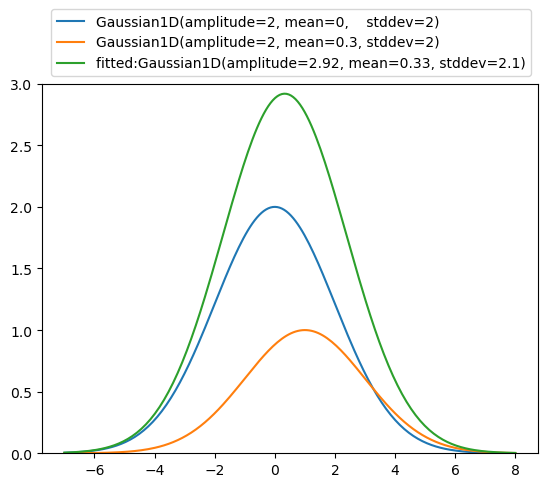

In [49]:
wave_list=np.linspace(-7,8,200)
# 1
c=[models.Gaussian1D(amplitude=2, mean=0, stddev=2),models.Gaussian1D(amplitude=1, mean=1, stddev=2)]
c_init=models.Gaussian1D(amplitude=2, mean=0.3, stddev=2)
fit_c = fitting.LevMarLSQFitter()
c_fitted=fit_c(c_init,wave_list,c[0](wave_list)+c[1](wave_list))

fig, ax = plt.subplots()
ax.plot(wave_list,c[0](wave_list),label="Gaussian1D(amplitude=2, mean=0,    stddev=2)")
ax.plot(wave_list,c[1](wave_list),label="Gaussian1D(amplitude=2, mean=0.3, stddev=2)")
ax.plot(wave_list,c_fitted(wave_list),label="fitted:Gaussian1D(amplitude=2.92, mean=0.33, stddev=2.1)")
fig.legend( bbox_to_anchor=(.9, 1.05))

ax.set_ylim(0,3)

c_fitted

### scattered

<Gaussian1D(amplitude=2.06796196, mean=-0.08495195, stddev=2.80129728)>

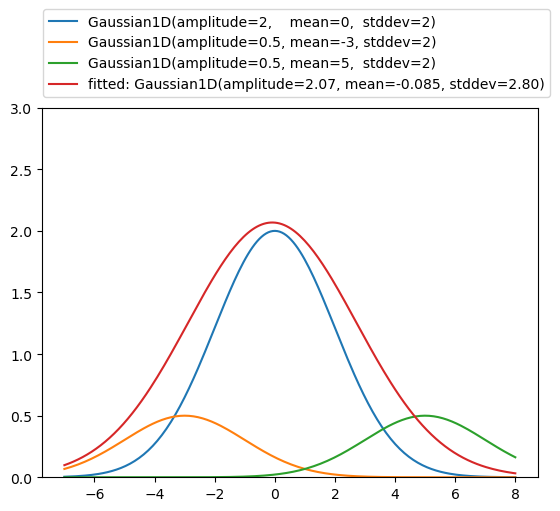

In [48]:
wave_list=np.linspace(-7, 8,200)
#-3 5
d=[models.Gaussian1D(amplitude=2, mean=0, stddev=2),models.Gaussian1D(amplitude=0.5, mean=-3, stddev=2),
   models.Gaussian1D(amplitude=0.5, mean=5, stddev=2)]
d_init=models.Gaussian1D(amplitude=2, mean=0.3, stddev=1)
fit_d = fitting.LevMarLSQFitter()
d_fitted=fit_d(d_init,wave_list,d[0](wave_list)+d[1](wave_list)+d[2](wave_list))

fig, ax = plt.subplots()
ax.plot(wave_list,d[0](wave_list),label="Gaussian1D(amplitude=2,    mean=0,  stddev=2)")
ax.plot(wave_list,d[1](wave_list),label="Gaussian1D(amplitude=0.5, mean=-3, stddev=2)")
ax.plot(wave_list,d[2](wave_list),label="Gaussian1D(amplitude=0.5, mean=5,  stddev=2)")

ax.plot(wave_list,d_fitted(wave_list),label="fitted: Gaussian1D(amplitude=2.07, mean=-0.085, stddev=2.80)")
fig.legend( bbox_to_anchor=(.93, 1.1))


ax.set_ylim(0,3)


d_fitted